<a href="https://colab.research.google.com/github/HiveCase/MachineLearningPractice/blob/main/Week8/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kaggle Dataset](https://www.kaggle.com/datasets/aleemaparakatta/cats-and-dogs-mini-dataset)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aleemaparakatta/cats-and-dogs-mini-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.9M/21.9M [00:00<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aleemaparakatta/cats-and-dogs-mini-dataset/versions/1


In [5]:
!mkdir dataset
!mv archive.zip dataset

mkdir: cannot create directory ‘dataset’: File exists


In [6]:
!cd dataset && unzip archive.zip

Archive:  archive.zip
  inflating: cats_set/cat.4001.jpg   
  inflating: cats_set/cat.4002.jpg   
  inflating: cats_set/cat.4003.jpg   
  inflating: cats_set/cat.4004.jpg   
  inflating: cats_set/cat.4005.jpg   
  inflating: cats_set/cat.4006.jpg   
  inflating: cats_set/cat.4007.jpg   
  inflating: cats_set/cat.4008.jpg   
  inflating: cats_set/cat.4009.jpg   
  inflating: cats_set/cat.4010.jpg   
  inflating: cats_set/cat.4011.jpg   
  inflating: cats_set/cat.4012.jpg   
  inflating: cats_set/cat.4013.jpg   
  inflating: cats_set/cat.4014.jpg   
  inflating: cats_set/cat.4015.jpg   
  inflating: cats_set/cat.4016.jpg   
  inflating: cats_set/cat.4017.jpg   
  inflating: cats_set/cat.4018.jpg   
  inflating: cats_set/cat.4019.jpg   
  inflating: cats_set/cat.4020.jpg   
  inflating: cats_set/cat.4021.jpg   
  inflating: cats_set/cat.4022.jpg   
  inflating: cats_set/cat.4023.jpg   
  inflating: cats_set/cat.4024.jpg   
  inflating: cats_set/cat.4025.jpg   
  inflating: cats_set/cat.40

In [11]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

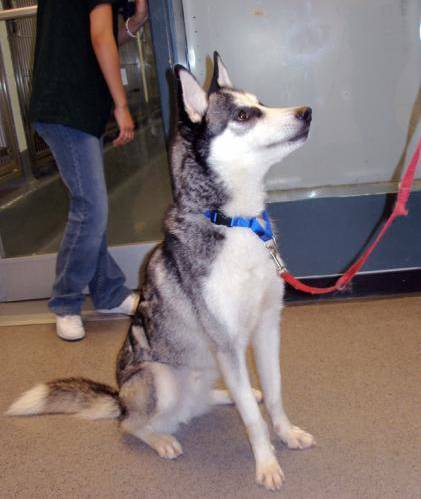

In [8]:
image_path = '/content/dataset/dogs/dog.4001.jpg'
image = Image.open(image_path)
image

In [9]:
image_array = np.array(image)
image_array.shape

(499, 421, 3)

array([[[125, 110,  87],
        [ 77,  62,  41],
        [ 77,  62,  43],
        ...,
        [140, 140, 148],
        [138, 138, 146],
        [139, 139, 147]],

       [[136, 124, 102],
        [ 88,  75,  56],
        [ 78,  65,  48],
        ...,
        [140, 140, 148],
        [139, 139, 147],
        [140, 140, 148]],

       [[145, 138, 120],
        [101,  94,  76],
        [ 76,  69,  53],
        ...,
        [140, 140, 148],
        [139, 139, 147],
        [140, 140, 148]],

       ...,

       [[157, 121, 105],
        [154, 119, 100],
        [161, 125, 109],
        ...,
        [163, 143, 136],
        [157, 137, 130],
        [152, 132, 125]],

       [[157, 122, 103],
        [154, 119, 100],
        [161, 126, 107],
        ...,
        [165, 145, 138],
        [157, 137, 130],
        [150, 130, 123]],

       [[157, 122, 103],
        [154, 119, 100],
        [161, 126, 107],
        ...,
        [165, 145, 138],
        [156, 136, 129],
        [148, 128, 121]]], dtype=uint8)
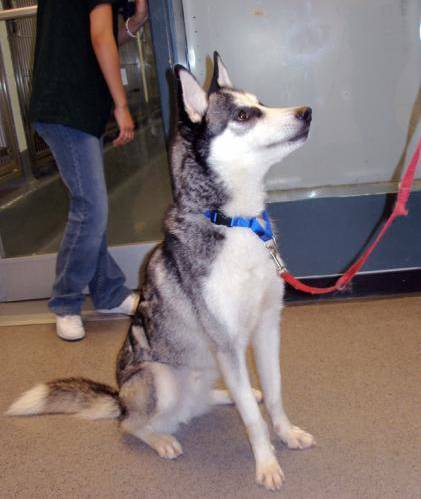

In [10]:
image_array

## Task 1: Load all Images & Labels

In [12]:
def load_images(data_dir, target_size=(200,200)):
  images = []
  labels = []
  class_names = os.listdir(data_dir)
  for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      try:
        image = Image.open(image_path)
        image = image.resize(target_size)
        image = image.convert('L')
        image_array = np.array(image).flatten()/255.0
        images.append(image_array)
        labels.append(class_name)
      except Exception as e:
        print(f"Error loading image {image_path} : {e}")
        continue
  return np.array(images), np.array(labels)

In [14]:
images, labels = load_images('/content/dataset')

In [15]:
images.shape

(1000, 40000)

In [16]:
labels.shape

(1000,)

## Task 2: Split the data - Train & Test sets

In [23]:
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [24]:
print(f"Training Data: {train_images.shape}, {train_labels.shape}")
print(f"Test Data: {test_images.shape}, {test_labels.shape}")

Training Data: (800, 40000), (800,)
Test Data: (200, 40000), (200,)


In [25]:
train_labels[:5]

array(['cats', 'dogs', 'dogs', 'dogs', 'dogs'], dtype='<U4')

In [26]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.fit_transform(test_labels)

In [27]:
train_labels[:5]

array([0, 1, 1, 1, 1])

## Training Data Augmentation

In [ ]:
def augment_data(images, labels, augmentation_factor=2):
